In [12]:

import os, sys, random
import xml.etree.ElementTree as ET
from glob import glob
import pandas as pd
from shutil import copyfile

annotations = glob('G:/deep learning projects/blood cell detection/BCCD_Dataset-master/BCCD/Annotations/*.xml')

df = []
cnt = 0
for file in annotations:
  prev_filename = file.split('/')[-1].split('.')[0] + '.jpg'
  filename = str(cnt) + '.jpg'
  row = []
  parsedXML = ET.parse(file)
  for node in parsedXML.getroot().iter('object'):
    blood_cells = node.find('name').text
    xmin = int(node.find('bndbox/xmin').text)
    xmax = int(node.find('bndbox/xmax').text)
    ymin = int(node.find('bndbox/ymin').text)
    ymax = int(node.find('bndbox/ymax').text)

    row = [prev_filename, filename, blood_cells, xmin, xmax,
    ymin, ymax]
    df.append(row)
    
  cnt += 1

data = pd.DataFrame(df, columns=['prev_filename', 'filename', 'cell_type',
'xmin', 'xmax', 'ymin', 'ymax'])

data[['filename', 'cell_type', 'xmin', 'xmax', 'ymin', 'ymax']].to_csv('train.csv')

In [7]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [22]:
# read the csv file using read_csv function of pandas
train = pd.read_csv('train.csv',index_col=0)
training_set=train.iloc[:3546,:]
test_set=train.iloc[3546:,:]

In [24]:
test_set['filename'].nunique()

99

In [26]:
training_set['cell_type'].value_counts()

RBC          3004
WBC           272
Platelets     270
Name: cell_type, dtype: int64

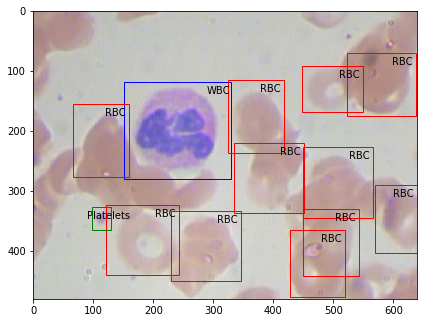

In [31]:
fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('G:/deep learning projects/blood cell detection/BCCD_Dataset-master/BCCD/train/BloodImage_00016.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in training_set[training_set.filename == "16.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    # assign different color to different classes of objects
    if row.cell_type == 'RBC':
        edgecolor = 'r'
        ax.annotate('RBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'WBC':
        edgecolor = 'b'
        ax.annotate('WBC', xy=(xmax-40,ymin+20))
    elif row.cell_type == 'Platelets':
        edgecolor = 'g'
        ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [ ]:
data = pd.DataFrame()
data['format'] = train['filename']

# as the images are in train_images folder, add train_images before the image name
for i in range(data.shape[0]):
    data['format'][i] = 'train/BloodImage_000.jpg' + data['format'][i]

# add xmin, ymin, xmax, ymax and class as per the format required
for i in range(data.shape[0]):
    data['format'][i] = data['format'][i] + ',' + str(train['xmin'][i]) + ',' + str(train['ymin'][i]) + ',' + str(train['xmax'][i]) + ',' + str(train['ymax'][i]) + ',' + train['cell_type'][i]

data.to_csv('annotate.txt', header=None, index=None, sep=' ')

In [32]:
train

,filename,cell_type,xmin,xmax,ymin,ymax
0,0.jpg,WBC,260,491,177,376
1,0.jpg,RBC,78,184,336,435
2,0.jpg,RBC,63,169,237,336
3,0.jpg,RBC,214,320,362,461
4,0.jpg,RBC,414,506,352,445
...,...,...,...,...,...,...
4883,363.jpg,Platelets,239,291,275,321
4884,363.jpg,Platelets,121,189,260,320
4885,363.jpg,Platelets,57,104,119,167
4886,363.jpg,Platelets,1,29,286,327
